# Titanic - Machine Learning from Disaster

 The Challenge

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from plotly import express as px
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [239]:
test = pd.read_csv('test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

In [240]:
test_dummy = pd.get_dummies(test[['Sex', 'Embarked']])
test_dummy = pd.concat([test, test_dummy], axis=1)
features_test = test_dummy[['Sex_female', 'Pclass', 'SibSp', 'Parch', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Age']]
features_test

,Sex_female,Pclass,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Age
0,0,3,0,0,0,1,0,34.5
1,1,3,1,0,0,0,1,47.0
2,0,2,0,0,0,1,0,62.0
3,0,3,0,0,0,0,1,27.0
4,1,3,1,1,0,0,1,22.0
...,...,...,...,...,...,...,...,...
413,0,3,0,0,0,0,1,NaN
414,1,1,0,0,1,0,0,39.0
415,0,3,0,0,0,0,1,38.5
416,0,3,0,0,0,0,1,NaN


In [4]:
gender_submission = pd.read_csv('gender_submission.csv')
gender_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0



The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

In [241]:
data = pd.read_csv('train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Exploratory data analysis

In [242]:
dummy = pd.get_dummies(data[['Embarked', 'Sex']])
dummy

,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,0,1,0,1
1,1,0,0,1,0
2,0,0,1,1,0
3,0,0,1,1,0
4,0,0,1,0,1
...,...,...,...,...,...
886,0,0,1,0,1
887,0,0,1,1,0
888,0,0,1,1,0
889,1,0,0,0,1


In [244]:
data_dummy = pd.concat([data, dummy], axis=1)
data_dummy.drop(['Embarked', 'Sex'], axis=1, inplace=True)
data_dummy

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,0,0,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,0,0,1,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,0,0,1,1,0
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,1,0,0,0,1


In [245]:
data_dummy.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.001205,-0.033606,0.022148,-0.042939,0.042939
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.168240,0.003650,-0.155660,0.543351,-0.543351
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.243292,0.221009,0.081720,-0.131900,0.131900
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.036261,-0.022405,-0.032523,-0.093254,0.093254
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.059528,-0.026354,0.070941,0.114631,-0.114631
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.011069,-0.081228,0.063036,0.245489,-0.245489
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.269335,-0.117216,-0.166603,0.182333,-0.182333
Embarked_C,-0.001205,0.168240,-0.243292,0.036261,-0.059528,-0.011069,0.269335,1.000000,-0.148258,-0.778359,0.082853,-0.082853
Embarked_Q,-0.033606,0.003650,0.221009,-0.022405,-0.026354,-0.081228,-0.117216,-0.148258,1.000000,-0.496624,0.074115,-0.074115
Embarked_S,0.022148,-0.155660,0.081720,-0.032523,0.070941,0.063036,-0.166603,-0.778359,-0.496624,1.000000,-0.125722,0.125722


In [246]:
list(data.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [247]:
data_f = data_dummy[['Survived', 'PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_female']]

<Axes: >

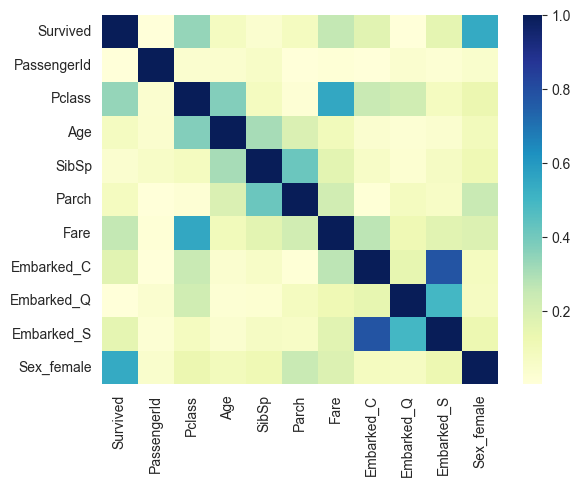

In [248]:
sns.heatmap(abs(data_f.corr()), cmap='YlGnBu')

As we can see there is correlation between Fare and Pclass. So I decided to leave only 1 variable -- Pclass ti exclude the distortion in the model. Same with SibSp and Parch, I leave only SibSp as it has more correlation coefficient with an outcome.

In [256]:
#features = data_dummy[['Pclass', 'Age', 'SibSp', 'Fare', 'Parch', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'female']]
features = data_dummy[['Sex_female', 'Pclass', 'SibSp', 'Parch', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Age']]
features['Age'] = round(features.Age.replace(np.NAN, features.Age.mean()))
features.Age = features.Age.astype(int)
features

/var/folders/dt/5tv_qbfj7p1gps2cqfpntfw40000gn/T/ipykernel_30732/2388269896.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Age'] = round(features.Age.replace(np.NAN, features.Age.mean()))
/Users/elena/virtual_environments/coding/lib/python3.9/site-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Sex_female,Pclass,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Age
0,0,3,1,0,0,0,1,22
1,1,1,1,0,1,0,0,38
2,1,3,0,0,0,0,1,26
3,1,1,1,0,0,0,1,35
4,0,3,0,0,0,0,1,35
...,...,...,...,...,...,...,...,...
886,0,2,0,0,0,0,1,27
887,1,1,0,0,0,0,1,19
888,1,3,1,2,0,0,1,30
889,0,1,0,0,1,0,0,26


In [257]:
features.to_csv('Features.csv')

In [250]:
from sklearn.preprocessing import StandardScaler
features = StandardScaler().fit_transform(features)


In [258]:
pd.DataFrame(features).to_csv('Features.csv', index=False)

In [118]:
x_train, x_test, y_train, y_test = train_test_split(features, data['Survived'], test_size=0.3)

In [119]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((623, 7), (623,), (268, 7), (268,))

### Function for plotting confusion matrix:

In [120]:
def plot_confusion_matrix(y,y_predict, cmap):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)

    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, cmap=cmap); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['did not survive', 'survive']); ax.yaxis.set_ticklabels(['did not survive', 'survive'])
    plt.show()

## KNN

In [121]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}
KNN = KNeighborsClassifier()
knn_grid = GridSearchCV(KNN, parameters, cv=10)
knn_grid.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [122]:
print("Tuned hyperparameters :(best parameters) ",knn_grid.best_params_)
print("Accuracy :", knn_grid.best_score_)

Tuned hyperparameters :(best parameters)  {'algorithm': 'ball_tree', 'n_neighbors': 4, 'p': 1}
Accuracy : 0.8089093701996927


In [123]:
KNN_accuracy = round(knn_grid.best_estimator_.score(x_test, y_test), 3)
print("Accuracy with score method: ", KNN_accuracy)

Accuracy with score method:  0.836


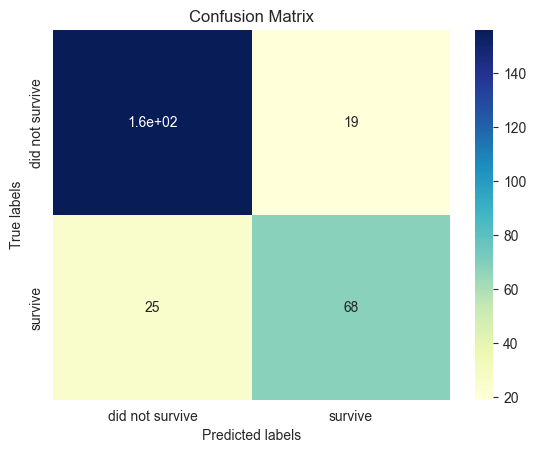

In [124]:
y_hat = knn_grid.best_estimator_.predict(x_test)
plot_confusion_matrix(y_test, y_hat, 'YlGnBu')

## Decision tree

In [125]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}
tree = DecisionTreeClassifier()
tree_grid = GridSearchCV(tree, parameters)
tree_grid.fit(x_train, y_train)

/Users/elena/virtual_environments/coding/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
1620 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1620 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/elena/virtual_environments/coding/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/elena/virtual_environments/coding/lib/python3.9/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/Users/elena/virtual_environments/coding/lib/python3.9/site-packages/sklearn/base.py", line 66

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [126]:
print("Tuned hyperparameters :(best parameters) ",tree_grid.best_params_)
print("Accuracy :", tree_grid.best_score_)

Tuned hyperparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
Accuracy : 0.8009290322580644


In [127]:
tree_accuracy = round(tree_grid.best_estimator_.score(x_test, y_test), 3)
print("Accuracy with score method: ", tree_accuracy)

Accuracy with score method:  0.825


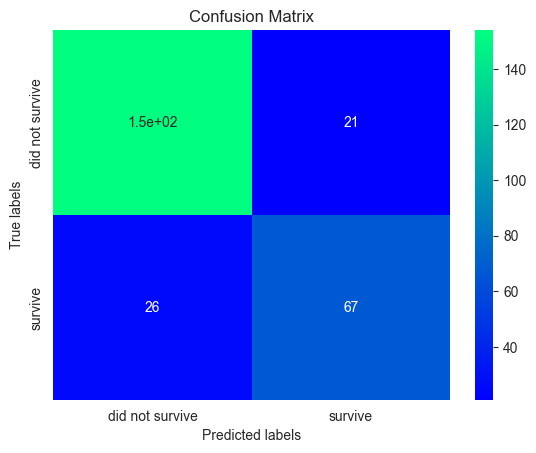

In [128]:
y_hat = tree_grid.best_estimator_.predict(x_test)
plot_confusion_matrix(y_test, y_hat, 'winter')

## Logistic regression

In [129]:
from sklearn.linear_model import LogisticRegression
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge

lr = LogisticRegression()
lr_grid = GridSearchCV(lr, parameters)
lr_grid.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [130]:
print("Tuned hyperparameters :(best parameters) ", lr_grid.best_params_)
print("Accuracy :", lr_grid.best_score_)

Tuned hyperparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy : 0.7929290322580645


In [131]:
log_reg_accuracy = round(lr_grid.best_estimator_.score(x_test, y_test), 3)
print("Accuracy with score method: ", log_reg_accuracy)

Accuracy with score method:  0.817


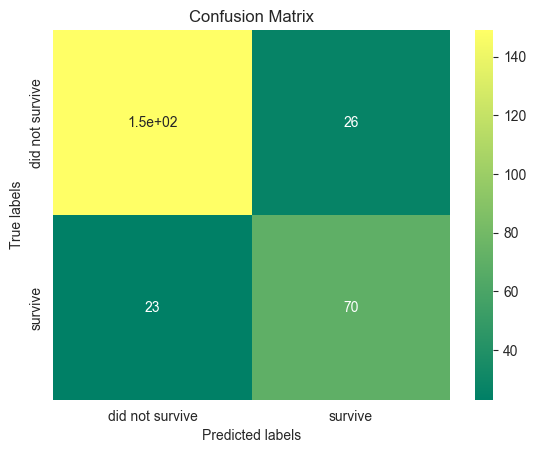

In [132]:
yhat = lr_grid.predict(x_test)
plot_confusion_matrix(y_test, yhat, 'summer')

## SVM

In [133]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')
'''parameters = {'kernel':('linear', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm_grid = GridSearchCV(svm, parameters, cv=10)'''

svm.fit(x_train, y_train)

SVC(kernel='linear')

In [134]:
svm_accuracy = svm.score(x_test, y_test)
print("Accuracy with score method: ", svm_accuracy)

Accuracy with score method:  0.7985074626865671


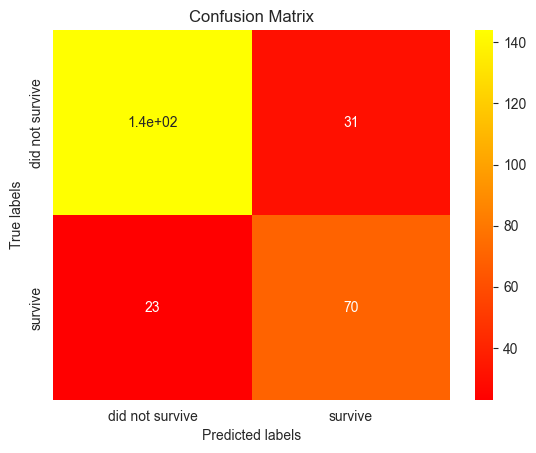

In [135]:
yhat = svm.predict(x_test)
plot_confusion_matrix(y_test, yhat, 'autumn')

## Random Forest

In [255]:
data['Survived'].to_csv('Survived.csv', index=False)
pd.DataFrame(features).to_csv(('Features.csv'), index=False)

In [212]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
param_grid = [{"n_estimators":[10,100,200,500], "max_depth":[None,5,10],"min_samples_split":[2,3,4]}]
forest_grid = GridSearchCV(forest, param_grid)
forest_grid.fit(features, data['Survived'])

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}])

In [213]:
print("Tuned hyperparameters :(best parameters) ", forest_grid.best_params_)
print("Accuracy :", forest_grid.best_score_)

Tuned hyperparameters :(best parameters)  {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 500}
Accuracy : 0.8305316678174629


## Prediction task


In [220]:
features_test = StandardScaler().fit_transform(features_test)
features_test

array([[ 0.87348191,  0.29854934, -0.49947002, ...,  2.84375747,
        -1.35067551, -0.75592895],
       [ 0.87348191,  1.18132793,  0.61699237, ..., -0.35164743,
         0.74037028,  1.32287566],
       [-0.31581919,  2.24066224, -0.49947002, ...,  2.84375747,
        -1.35067551, -0.75592895],
       ...,
       [ 0.87348191,  0.58103849, -0.49947002, ..., -0.35164743,
         0.74037028, -0.75592895],
       [ 0.87348191,         nan, -0.49947002, ..., -0.35164743,
         0.74037028, -0.75592895],
       [ 0.87348191,         nan,  0.61699237, ..., -0.35164743,
        -1.35067551, -0.75592895]])

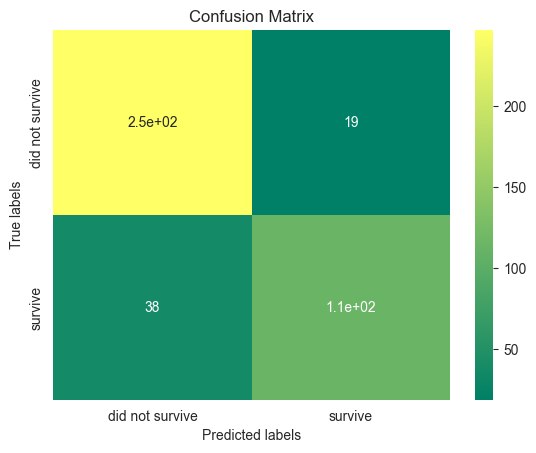

In [221]:
yhat_finaltask = forest_grid.best_estimator_.predict(features_test)
plot_confusion_matrix(gender_submission['Survived'], yhat_finaltask, 'summer')

In [226]:
forest_accuracy = forest_grid.score(features_test, gender_submission['Survived'])
print("Accuracy with score method: ", forest_accuracy)

Accuracy with score method:  0.8636363636363636


In [223]:
final_prediction = pd.DataFrame(test['PassengerId'])
final_prediction['Survived'] = yhat_finaltask
final_prediction

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [232]:
final_prediction.to_csv('Titanik_predict.csv', index=False)

In [224]:
pd.concat([final_prediction, gender_submission], axis=1)

,PassengerId,Survived,PassengerId,Survived
0,892,0,892,0
1,893,0,893,1
2,894,0,894,0
3,895,0,895,0
4,896,0,896,1
...,...,...,...,...
413,1305,0,1305,0
414,1306,1,1306,1
415,1307,0,1307,0
416,1308,0,1308,0


In [233]:
df = pd.read_csv('Titanik_predict.csv')

In [234]:
df.columns

Index(['PassengerId', 'Survived'], dtype='object')

In [236]:
pd.DataFrame(features).to_csv('features.csv')